## Contexto

Una entidad bancaria acaba de realizar una campaña de marketing, cuyo objetivo buscaba lograr que los clientes contactados depositaran sus ahorros a plazo fijo. Los resultados fueron peor de lo esperado.
Esta campaña se enfocó en un 10% de la cartera total de clientes del banco.

El banco contrata nuestros servicios como científic@ de datos y nos comunica los siguintes objetivos:

* Repetir una o más campañas en el transcurso de los siguientes 18 meses. 
* Maximizar la tasa de conversión de las mismas y entender los factores que influyen en esta tasa.

El banco nos provee la lista de los ~4.5K clientes ("clientes.csv")
https://drive.google.com/file/d/1y3sPhGrLUW5DPunat__2xp2NAWJVDWIL/view?usp=sharing
que fueron contactados durante esta última campaña y nos informa que por el momento NO nos proveerá de mas datos que estos.


Nuestra tarea consiste en ayudar al banco a cumplir sus objetivos.

### Metadata

#### Datos clientes
1. age: edad del clietne
2. job: tipo de trabajo
3. marital: estado civil
4. education: nivel de educación
5. default: indica si el cliente registra algún default crediticio
5. balance: saldo en dólares de la caja de ahorro del cliente
6. housing: indica si el cliente posee un préstamo hipotecario
7. loan: indica si el cliente posee algún préstamo personal

#### Datos del último contacto de la campaña actual
9. contact: canal de contacto
10. day: día de último contacto
11. month: mes de último contacto
12. duration: duracion del último contacto
13. campaign: cantidad de contactos durante la campaña

#### Datos campaña previa
14. pdays: días transcurridos desde el último contacto por una campaña previa
15. previous: cantidad de contactos previous a esta campaña
16. poutcome: resultado de la campaña previa

#### Resultado campaña actual
17. y - Indica si el cliente realizó depósito a plazo fijo(binaria: 'yes','no')

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%pwd

'C:\\Users\\alejo\\UCEMA\\poo_teorica\\poo_ejercicios\\04-transformaciones'

In [6]:
df_clientes = pd.read_csv('../data_extra/clientes.csv',delimiter=';')
df_clientes

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [10]:
df_clientes.age.describe()

count    4521.000000
mean       41.170095
std        10.576211
min        19.000000
25%        33.000000
50%        39.000000
75%        49.000000
max        87.000000
Name: age, dtype: float64

In [13]:
df_clientes['edad'] = pd.qcut(df_clientes.age, q=3, labels=['jovenes','adultos','mayores'])
df_clientes.edad.value_counts()

jovenes    1652
mayores    1481
adultos    1388
Name: edad, dtype: int64

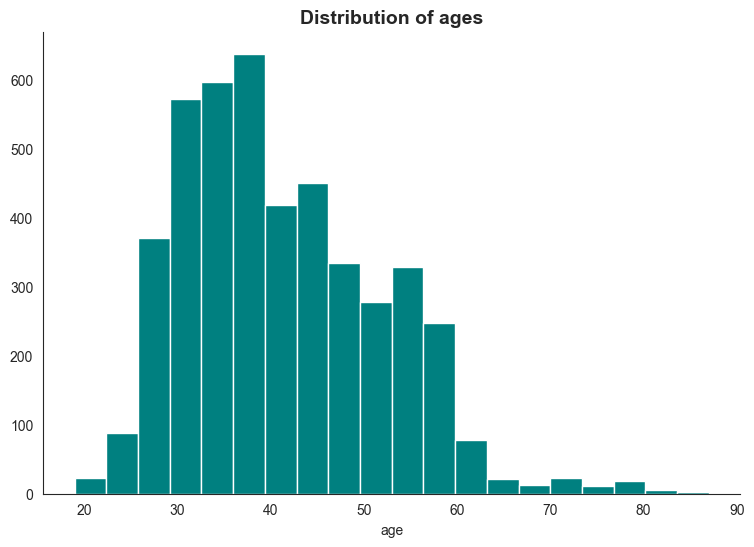

In [17]:
plt.figure(figsize=(9,6))
sns.set_style("white")
plt.hist(df_clientes["age"], bins=20, color="#008080")
plt.title("Distribution of ages", fontsize=14, weight="bold")
plt.xlabel("age")
sns.despine()
plt.show()

In [20]:
df_clientes.job.value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [22]:
df_clientes.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
edad         0
dtype: int64

In [24]:
count_job_ed = df_clientes.groupby(['job','education']).count()['age']

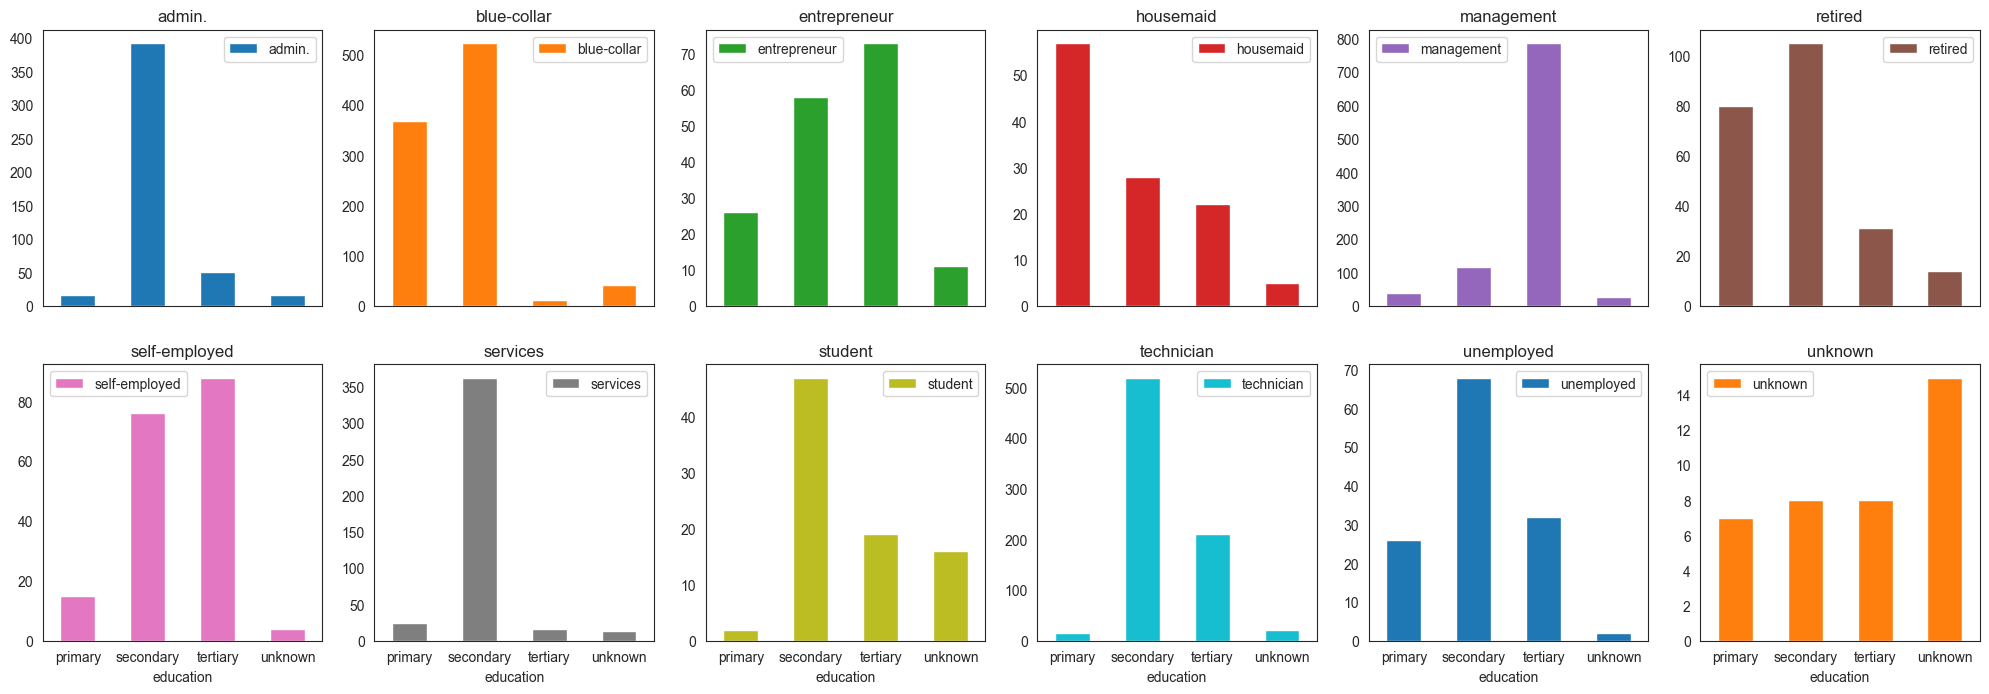

In [30]:
ax = count_job_ed.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(20, 20), layout= (6,6))
plt.tight_layout()

In [31]:
df_clientes.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'edad'],
      dtype='object')

In [32]:
df_clientes.default.value_counts()

no     4445
yes      76
Name: default, dtype: int64

In [34]:
deudores = df_clientes[df_clientes.default=='yes']

In [36]:
deudores.groupby('edad').count()['age']

edad
jovenes    31
adultos    20
mayores    25
Name: age, dtype: int64

In [37]:
deudores.groupby('job').count()['age']

job
admin.            6
blue-collar      14
entrepreneur      7
housemaid         2
management       14
retired           3
self-employed     4
services          7
student           1
technician       15
unemployed        3
Name: age, dtype: int64

In [38]:
deudores.groupby('marital').count()['age']

marital
divorced    18
married     36
single      22
Name: age, dtype: int64

In [39]:
deudores.groupby('education').count()['age']

education
primary      10
secondary    46
tertiary     17
unknown       3
Name: age, dtype: int64

In [41]:
deudores.groupby('balance').count()['age']


balance
-3313    1
-2082    1
-1680    1
-1164    1
-849     1
        ..
 375     1
 421     1
 447     1
 720     1
 1238    1
Name: age, Length: 64, dtype: int64

In [44]:
deudores

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,edad
48,32,entrepreneur,single,primary,yes,-849,yes,yes,cellular,4,feb,204,1,-1,0,unknown,no,jovenes
71,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no,adultos
124,51,management,single,tertiary,yes,-55,yes,no,cellular,11,may,281,2,266,6,failure,no,mayores
132,43,blue-collar,married,unknown,yes,-715,yes,no,unknown,30,may,67,3,-1,0,unknown,no,adultos
152,45,unemployed,divorced,primary,yes,-249,yes,yes,unknown,1,jul,92,1,-1,0,unknown,no,adultos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4120,31,self-employed,single,tertiary,yes,-282,yes,no,cellular,20,nov,131,3,-1,0,unknown,no,jovenes
4257,32,services,married,secondary,yes,-220,yes,yes,cellular,25,jul,123,2,-1,0,unknown,no,jovenes
4279,31,housemaid,married,unknown,yes,-6,no,yes,telephone,7,jul,94,2,-1,0,unknown,no,jovenes
4317,27,services,single,secondary,yes,-1,no,no,cellular,22,jul,60,2,-1,0,unknown,no,jovenes
